In [1]:
#Load libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sdv import SDV
from sdv import Metadata
from matplotlib import pyplot as plt

In [2]:
HOME_PATH = '' #home path of the project
TRAIN_FILE = 'REAL DATASETS/TRAIN DATASETS/F_IndianLiverPatient_Real_Train.csv'
SYNTHETIC_FILE = 'SYNTHETIC DATASETS/SDV/F_IndianLiverPatient_Synthetic_SDV.csv'

## 1. Read data

In [3]:
real_data = pd.read_csv(HOME_PATH + TRAIN_FILE)
categorical_columns = ['gender','class']
for c in categorical_columns :
    real_data[c] = real_data[c].astype('category')
real_data

,age,gender,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
0,68,Female,0.6,0.1,1620.0,95.0,127.0,4.6,2.1,0.80,1.0
1,31,Male,1.3,0.5,184.0,29.0,32.0,6.8,3.4,1.00,1.0
2,28,Male,0.8,0.3,190.0,20.0,14.0,4.1,2.4,1.40,1.0
3,60,Male,2.3,0.6,272.0,79.0,51.0,6.6,3.5,1.10,1.0
4,48,Female,0.9,0.2,173.0,26.0,27.0,6.2,3.1,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...
461,75,Female,0.8,0.2,188.0,20.0,29.0,4.4,1.8,0.60,1.0
462,36,Male,5.3,2.3,145.0,32.0,92.0,5.1,2.6,1.00,2.0
463,37,Male,0.7,0.2,235.0,96.0,54.0,9.5,4.9,1.00,1.0
464,17,Female,0.5,0.1,206.0,28.0,21.0,7.1,4.5,1.70,2.0


In [4]:
real_data.dtypes

age           int64
gender     category
TB          float64
DB          float64
alkphos     float64
sgpt        float64
sgot        float64
TP          float64
ALB         float64
A_G         float64
class      category
dtype: object

### 1.1. Create metada

In [5]:
metadata = Metadata()
metadata.add_table(name='data', data=real_data, primary_key='')
metadata

Metadata
  root_path: .
  tables: ['data']
  relationships:

In [6]:
tables = dict()
tables['data'] = real_data
tables

{'data':      age  gender   TB   DB  alkphos  sgpt   sgot   TP  ALB   A_G class
 0     68  Female  0.6  0.1   1620.0  95.0  127.0  4.6  2.1  0.80   1.0
 1     31    Male  1.3  0.5    184.0  29.0   32.0  6.8  3.4  1.00   1.0
 2     28    Male  0.8  0.3    190.0  20.0   14.0  4.1  2.4  1.40   1.0
 3     60    Male  2.3  0.6    272.0  79.0   51.0  6.6  3.5  1.10   1.0
 4     48  Female  0.9  0.2    173.0  26.0   27.0  6.2  3.1  1.00   1.0
 ..   ...     ...  ...  ...      ...   ...    ...  ...  ...   ...   ...
 461   75  Female  0.8  0.2    188.0  20.0   29.0  4.4  1.8  0.60   1.0
 462   36    Male  5.3  2.3    145.0  32.0   92.0  5.1  2.6  1.00   2.0
 463   37    Male  0.7  0.2    235.0  96.0   54.0  9.5  4.9  1.00   1.0
 464   17  Female  0.5  0.1    206.0  28.0   21.0  7.1  4.5  1.70   2.0
 465   17    Male  0.9  0.2    224.0  36.0   45.0  6.9  4.2  1.55   1.0
 
 [466 rows x 11 columns]}

## 2. Train the model and generate data

In [7]:
sdv = SDV()
sdv.fit(metadata, tables)

In [8]:
samples = sdv.sample()
synthetic_data = samples['data']
synthetic_data

,age,gender,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
0,44,Male,-8.271991,-4.476905,392.914043,-50.983111,-356.789066,5.475303,2.835597,-6794.228306,1.0
1,46,Male,-6.591990,-3.321065,274.810638,-2.393596,-115.098892,7.705353,4.342642,-7235.217909,2.0
2,9,Male,8.730495,4.244763,592.185733,65.930033,448.093787,7.274729,3.404617,-1607.479859,1.0
3,46,Male,5.293364,2.570853,349.147940,-281.300089,-220.240977,6.512870,2.719294,-4034.469421,2.0
4,33,Male,-0.128797,-0.022839,387.605730,13.571040,-76.214437,6.490126,3.268327,8117.891280,1.0
...,...,...,...,...,...,...,...,...,...,...,...
461,62,Male,-1.602158,-0.767336,-63.945153,-97.682541,-158.170740,7.476254,4.313685,-4001.765267,2.0
462,7,Female,13.958051,6.521889,208.505150,411.582138,198.957826,7.507005,4.353095,10646.828445,1.0
463,52,Male,-8.276377,-3.310755,761.443621,-159.590405,-316.554976,6.231814,2.935449,2055.753407,1.0
464,60,Male,14.793789,5.754769,798.676823,-319.768204,-409.546828,6.091363,2.311569,11312.519524,1.0


In [9]:
float_1 = ['TB','DB','alkphos','sgpt','sgot','TP','ALB']
for col in float_1 :
    synthetic_data[col] = abs(np.round(synthetic_data[col],1))
float_2 = ['A_G']
for col in float_2 :
    synthetic_data[col] = abs(np.round(synthetic_data[col],2))
synthetic_data

,age,gender,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
0,44,Male,8.3,4.5,392.9,51.0,356.8,5.5,2.8,6794.23,1.0
1,46,Male,6.6,3.3,274.8,2.4,115.1,7.7,4.3,7235.22,2.0
2,9,Male,8.7,4.2,592.2,65.9,448.1,7.3,3.4,1607.48,1.0
3,46,Male,5.3,2.6,349.1,281.3,220.2,6.5,2.7,4034.47,2.0
4,33,Male,0.1,0.0,387.6,13.6,76.2,6.5,3.3,8117.89,1.0
...,...,...,...,...,...,...,...,...,...,...,...
461,62,Male,1.6,0.8,63.9,97.7,158.2,7.5,4.3,4001.77,2.0
462,7,Female,14.0,6.5,208.5,411.6,199.0,7.5,4.4,10646.83,1.0
463,52,Male,8.3,3.3,761.4,159.6,316.6,6.2,2.9,2055.75,1.0
464,60,Male,14.8,5.8,798.7,319.8,409.5,6.1,2.3,11312.52,1.0


In [10]:
real_data.describe()

,age,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,44.212446,3.318455,1.472532,289.995708,84.251073,116.491416,6.503004,3.160300,-428.230429
std,15.650069,6.335770,2.774472,245.212815,196.869782,314.013021,1.087422,0.793272,6544.232426
min,4.000000,0.400000,0.100000,63.000000,10.000000,11.000000,2.700000,0.900000,-100000.000000
25%,32.250000,0.800000,0.200000,174.000000,24.000000,26.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,206.000000,36.000000,43.000000,6.600000,3.100000,0.980000
75%,56.000000,2.675000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000
max,85.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


In [11]:
synthetic_data.describe()

,age,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,43.748927,5.818026,2.531116,324.074678,172.763948,270.202361,6.562661,3.175107,4813.694313
std,15.710528,4.417056,1.966996,210.504056,129.839791,197.507115,1.058819,0.754757,3649.869230
min,0.000000,0.000000,0.000000,0.300000,0.100000,0.200000,3.700000,1.000000,12.760000
25%,33.000000,2.400000,1.000000,154.225000,65.525000,112.425000,5.800000,2.700000,1971.627500
50%,44.000000,4.700000,2.100000,307.000000,151.050000,227.100000,6.500000,3.100000,4083.505000
75%,53.000000,8.300000,3.700000,471.350000,253.375000,390.475000,7.300000,3.700000,6864.657500
max,93.000000,21.500000,9.400000,1180.300000,661.800000,1029.200000,9.700000,5.700000,20507.210000


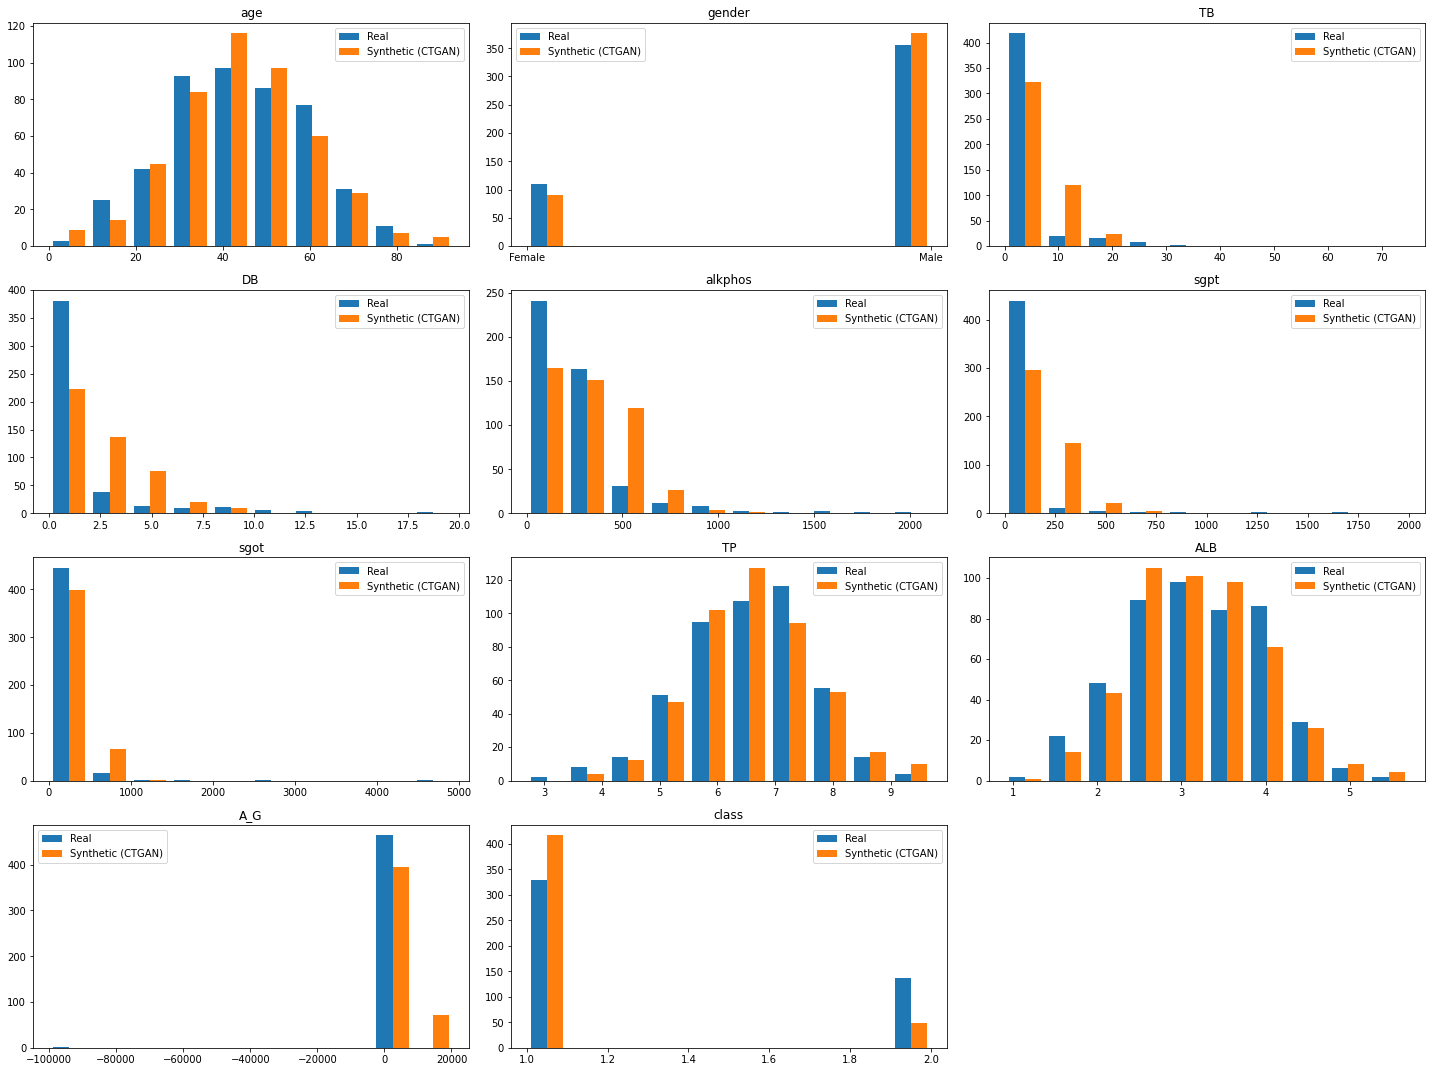

In [12]:
columns = real_data.columns
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20,15))
idx = {0:[0,0], 1:[0,1], 2:[0,2], 3:[1,0], 4:[1,1], 5:[1,2], 6:[2,0], 7:[2,1], 8:[2,2], 9:[3,0], 10:[3,1], 11:[3,2]}
for i in range(0,len(columns)) :
    data = np.column_stack((real_data[columns[i]], synthetic_data[columns[i]]))
    axs[idx[i][0], idx[i][1]].hist(data, density=False, histtype='bar', label=['Real','Synthetic (CTGAN)'])
    axs[idx[i][0], idx[i][1]].set_title(columns[i])
    axs[idx[i][0], idx[i][1]].legend()
fig.delaxes(axs[3,2])
fig.tight_layout(pad=1.1)

In [14]:
synthetic_data.to_csv(HOME_PATH + SYNTHETIC_FILE, index = False)